In [1]:
###########################################################
# BARBEQuE                                                #
# Bring A Rational Bell Experiment on Quantum Experience  #
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
# Repository: https://github.com/qismib/BARBEQuE          #
# Marco Gobbo: https://github.com/marcogobbo              #
# Organization: https://github.com/qismib                 #
###########################################################

%matplotlib inline

import barbeque as bq
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

# Compute probabilities pAB, pAC, pCB
def compute(angles, launcher, mode):
    
    backend = launcher['backend']
    shots = launcher['shots']
        
    # Executing (depending on the mode)
    if mode == 0 or mode == 1:
        for i, angle in enumerate(angles) :
            bq.bellExperiment("%s_%sa%ss_pAB" % (backend, len(angles), shots), [0, 2*angle], launcher, mode)
            bq.bellExperiment("%s_%sa%ss_pAC" % (backend, len(angles), shots), [0, angle], launcher, mode)
            bq.bellExperiment("%s_%sa%ss_pCB" % (backend, len(angles), shots), [angle, 2*angle], launcher, mode)
            
    elif mode == 2:
        print("[WORK IN PROGRESS]: Need to find a solution to split angles")
        
    if bq.DEBUG_MODE:
        print("[INFO]: The compute has been completed successfully.")

    return None

# Analyze the data
def analyzer(angles, launcher, mode):
    
    backend = launcher['backend']
    shots = launcher['shots']
    
    # Plotting figure
    fig = plt.figure()
    
    # Const function (Classical limit)
    x = np.arange(angles[-1]*180/np.pi)
    plt.plot(x, x*0)
    
    # Labelling axes and title
    plt.xlabel('Angle [degree]')
    plt.ylabel('Probability')
    plt.title("Bell's inequality on %s" % backend)

    
    if mode == 0:
        data, pAB_00, pAC_00, pCB_00 = [], [], [], []
        
        # Reading data
        pAB = bq.loadData("mode_0/%s_%sa%ss_pAB" % (backend, len(angles), shots))
        pAC = bq.loadData("mode_0/%s_%sa%ss_pAC" % (backend, len(angles), shots))
        pCB = bq.loadData("mode_0/%s_%sa%ss_pCB" % (backend, len(angles), shots))
        
        if bq.DEBUG_MODE:
            print("[INFO]: All data has been loaded.")

        # Evaluating only 00
        for i, angle in enumerate(angles) :
            pAB_00.append(pAB[i]['00'])
            pAC_00.append(pAC[i]['00'])
            pCB_00.append(pCB[i]['00'])

            data.append(pAC_00[i] + pCB_00[i] - pAB_00[i])
            
        if bq.DEBUG_MODE:
            print("[INFO]: P(00) has been evaluated.")
        
        # Data distribution (Data processed)
        plt.plot(angles*180/np.pi, data, 'ro', markersize = 1, label = "experimental-data")
        
        if bq.DEBUG_MODE:
            print("[INFO]: All data has been plotted.")
        
        # Initial guess (Theoretical value)
        initial_guess = [0.5, 0.5, 0.5]

        # Fitting data 
        popt, pcov = curve_fit(bq.fitFunc, angles, data, initial_guess)
        plt.plot(angles*180/np.pi, bq.fitFunc(angles, *popt), 'y', label='fit-params: a=%5.2f, b=%5.2f, c=%5.2f' % tuple(popt))
        
        if bq.DEBUG_MODE:
            print("[INFO]: Fit has been done.")
        
        # Legend position
        plt.legend(loc='best')
        
    elif mode == 1:
        data_c1, data_c2, pAB_00_c1, pAC_00_c1, pCB_00_c1, pAB_00_c2, pAC_00_c2, pCB_00_c2 = [], [], [], [], [], [], [], []

        # Reading data
        pAB_c1 = bq.loadData("mode_1/%s_%sa%ss_pAB_c1" % (backend, len(angles), shots))
        pAC_c1 = bq.loadData("mode_1/%s_%sa%ss_pAC_c1" % (backend, len(angles), shots))
        pCB_c1 = bq.loadData("mode_1/%s_%sa%ss_pCB_c1" % (backend, len(angles), shots))
        
        pAB_c2 = bq.loadData("mode_1/%s_%sa%ss_pAB_c2" % (backend, len(angles), shots))
        pAC_c2 = bq.loadData("mode_1/%s_%sa%ss_pAC_c2" % (backend, len(angles), shots))
        pCB_c2 = bq.loadData("mode_1/%s_%sa%ss_pCB_c2" % (backend, len(angles), shots))
        
        if bq.DEBUG_MODE:
            print("[INFO]: All data has been loaded.")
            
        # Evaluating only 00
        for i, angle in enumerate(angles) :
            pAB_00_c1.append(pAB_c1[i]['00'])
            pAC_00_c1.append(pAC_c1[i]['00'])
            pCB_00_c1.append(pCB_c1[i]['00'])

            data_c1.append(pAC_00_c1[i] + pCB_00_c1[i] - pAB_00_c1[i])
            
            pAB_00_c2.append(pAB_c2[i]['00'])
            pAC_00_c2.append(pAC_c2[i]['00'])
            pCB_00_c2.append(pCB_c2[i]['00'])

            data_c2.append(pAC_00_c2[i] + pCB_00_c2[i] - pAB_00_c2[i])
            
        if bq.DEBUG_MODE:
            print("[INFO]: P(00) has been evaluated.")
            
        # Data distribution (Data processed)
        plt.plot(angles*180/np.pi, data_c1, 'ro', markersize = 1, label = "experimental-data")
        plt.plot(angles*180/np.pi, data_c2, 'ro', markersize = 1, label = "experimental-data")
        
        if bq.DEBUG_MODE:
            print("[INFO]: All data has been plotted.")
            
        # Legend position
        plt.legend(loc='best')
        
    elif mode == 2:
        data_c1, data_c2, pAB_00_c1, pAC_00_c1, pCB_00_c1, pAB_00_c2, pAC_00_c2, pCB_00_c2 = [], [], [], [], [], [], [], []
        
    else:
        print("[WORK IN PROGRESS]: Need to find a solution to split angles")
    
    # Print the plot
    plt.show()
    fig.savefig("plots/mode_%s/%s_%sa%ss.pdf" % (mode, backend, len(angles), shots) , bbox_inches='tight')
    
    if bq.DEBUG_MODE:
        print("[INFO]: Plot has been printed.")
        print("[INFO]: Everything works. ")
    
    return None

/Users/marcogobbo/opt/anaconda3/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [2]:
#bq.loadBackends()
#compute(np.linspace(0, 2*np.pi, 360), {'backend': 'qasm_simulator', 'shots': 8192}, 0)
#analyzer(np.linspace(0, 2*np.pi, 360), {'backend': 'qasm_simulator', 'shots': 8192}, 0)

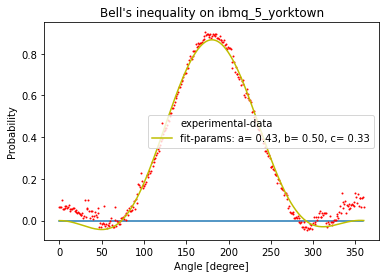

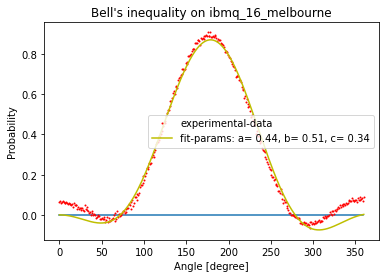

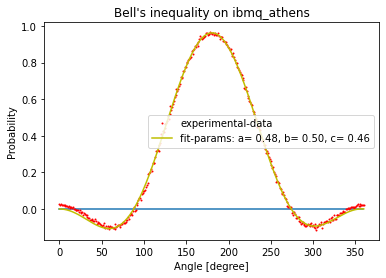

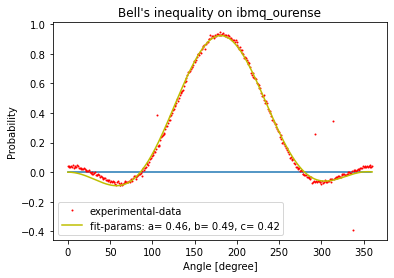

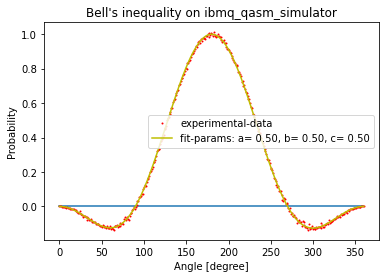

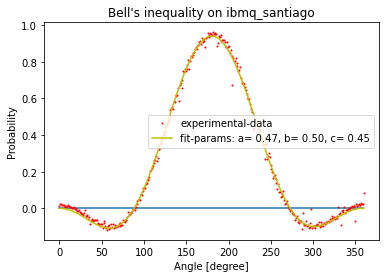

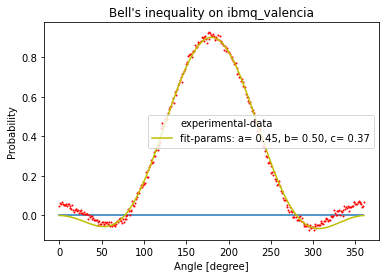

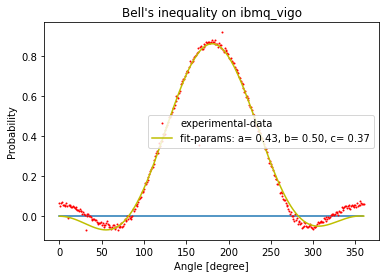

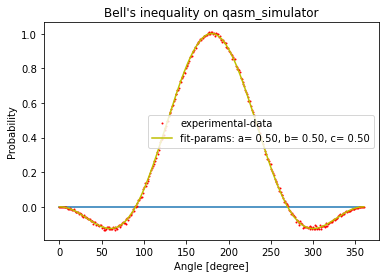

In [3]:
#analyzer(np.linspace(0, 2*np.pi, 360), {'backend': 'ibmq_5_yorktown', 'shots': 8192}, 0)
#analyzer(np.linspace(0, 2*np.pi, 360), {'backend': 'ibmq_16_melbourne', 'shots': 8192}, 0)
#analyzer(np.linspace(0, 2*np.pi, 360), {'backend': 'ibmq_athens', 'shots': 8192}, 0)
#analyzer(np.linspace(0, 2*np.pi, 360), {'backend': 'ibmq_ourense', 'shots': 8192}, 0)
#analyzer(np.linspace(0, 2*np.pi, 360), {'backend': 'ibmq_qasm_simulator', 'shots': 8192}, 0)
#analyzer(np.linspace(0, 2*np.pi, 360), {'backend': 'ibmq_santiago', 'shots': 8192}, 0)
#analyzer(np.linspace(0, 2*np.pi, 360), {'backend': 'ibmq_valencia', 'shots': 8192}, 0)
#analyzer(np.linspace(0, 2*np.pi, 360), {'backend': 'ibmq_vigo', 'shots': 8192}, 0)
#analyzer(np.linspace(0, 2*np.pi, 360), {'backend': 'qasm_simulator', 'shots': 10000}, 0)